<a href="https://colab.research.google.com/github/Faizan-Rashid/Deep-Learning/blob/main/optimization_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Newton's Method for Optimization

his method helps us find the lowest point in a valley (minimum) or the highest peak on a mountain (maximum)

## 1.2 Example Function to minimize (find the lowest value)

$f(x) = x^4 - 3x^3 + 2$

the plot of this function shows it's landscape with multiple local minima and maxima.

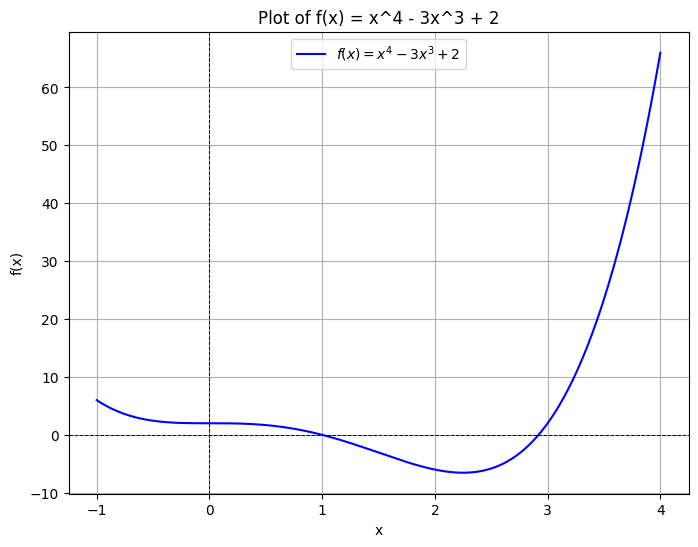

In [ ]:
# ploting the function
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**4 - 3*x**3 + 2

# Generate x values
x_vals = np.linspace(-1, 4, 400)  # adjust range to see shape clearly
y_vals = f(x_vals)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = x^4 - 3x^3 + 2$", color="blue")
plt.axhline(0, color="black", linewidth=0.7, linestyle="--")  # x-axis
plt.axvline(0, color="black", linewidth=0.7, linestyle="--")  # y-axis
plt.title("Plot of f(x) = x^4 - 3x^3 + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


### 1.2.1 General Approach with Initial Guess

## Newton's Method — Starting Point

To minimize this function using **Newton's Method**, we start with an initial guess. Let's choose $x_0 = 3$. The choice here is simply arbitrary.

The red point on the plot shows our starting point. We will update this guess step by step, moving closer to the minimum.


### 1.2.2 Updating the Guess Using Newton's Method

Newton's Method updates our guess using the **first** and **second derivatives**.  
The update formula is:

$
x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}
$

---

For our function:  

$
f(x) = x^4 - 3x^3 + 2
$

- First derivative:  
$
f'(x) = 4x^3 - 9x^2
$

- Second derivative:  
$
f''(x) = 12x^2 - 18x
$

---

⚠️ **Important Note**: Newton's Method finds a **critical point**, which could be a **minimum**, **maximum**, or a **saddle point** — not always the global minimum.


## 1.3 Python Implementation and Optimization Path

In [ ]:
def f_prime(x):
    return 4 * x ** 3 - 9 * x ** 2

def f_double_prime(x):
    return 12 * x ** 2 - 18*x


def newtons_method(f_prime, f_double_prime, x0, max_iterations=10, tolerance=1e-6):
    x = x0
    steps = [x]  # Track the optimization path
    for _ in range(max_iterations):
        f_prime_value = f_prime(x)
        f_double_prime_value = f_double_prime(x)

        if abs(f_prime_value) < tolerance:
            break  # Convergence criterion

        x = x - f_prime_value / f_double_prime_value
        steps.append(x)

    return x, steps

initial_guess = 3
optimal_x, optimization_path = newtons_method(f_prime, f_double_prime, initial_guess)
print("Optimal x using Newton's Method:", optimal_x)  # Optimal x using Newton's Method: ~2.25

Optimal x using Newton's Method: 2.2500000000031966


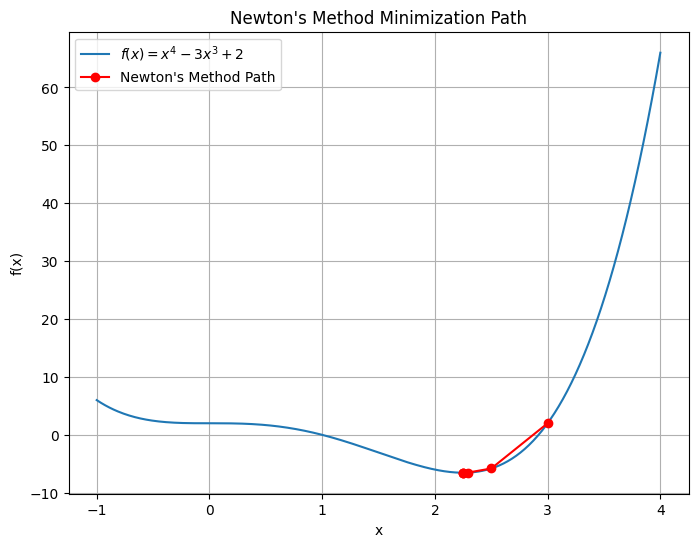

Optimal x using Newton's Method: 2.2500000000031966


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and derivatives
def f(x):
    return x**4 - 3*x**3 + 2

def f_prime(x):
    return 4 * x**3 - 9 * x**2

def f_double_prime(x):
    return 12 * x**2 - 18*x

# Newton's method
def newtons_method(f_prime, f_double_prime, x0, max_iterations=10, tolerance=1e-6):
    x = x0
    steps = [x]
    for _ in range(max_iterations):
        f_prime_value = f_prime(x)
        f_double_prime_value = f_double_prime(x)

        if abs(f_prime_value) < tolerance:
            break

        x = x - f_prime_value / f_double_prime_value
        steps.append(x)

    return x, steps

# Initial guess
initial_guess = 3
optimal_x, path = newtons_method(f_prime, f_double_prime, initial_guess)

# Plotting
x_vals = np.linspace(-1, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, label=r"$f(x)=x^4 - 3x^3 + 2$")
plt.plot(path, f(np.array(path)), 'ro-', label="Newton's Method Path")  # red dots + red line
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton's Method Minimization Path")
plt.legend()
plt.grid(True)
plt.show()

print("Optimal x using Newton's Method:", optimal_x)


## Potential Pitfalls in Newton's Method

Here, due to the poor choice of the initial guess, the algorithm didn't converge to the true minimum of the function.

There are several methods to address this issue:

* Multiple Initial Guesses: Start the algorithm from different initial guesses to increase the chance of finding the global minimum.

* Modify the Function: Transform the original function to make the global minimum more prominent. For example, you can add a perturbation term to avoid local minima.

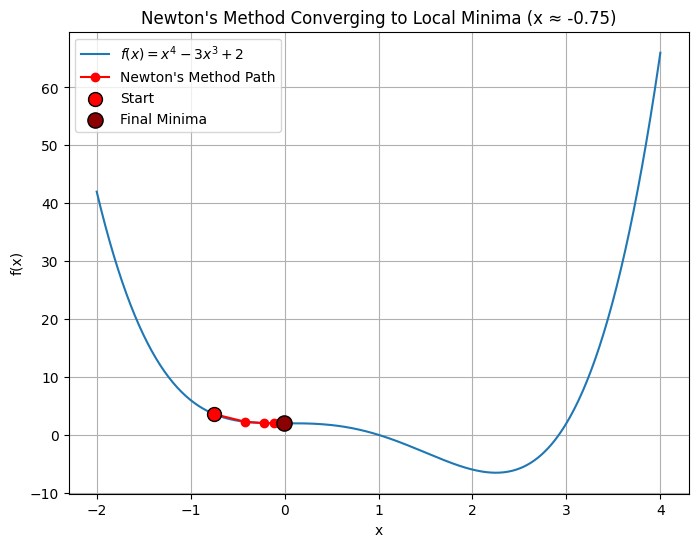

Optimal x using Newton's Method: -0.0009564787696796353


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and derivatives
def f(x):
    return x**4 - 3*x**3 + 2

def f_prime(x):
    return 4 * x**3 - 9 * x**2

def f_double_prime(x):
    return 12 * x**2 - 18*x

# Newton's method
def newtons_method(f_prime, f_double_prime, x0, max_iterations=10, tolerance=1e-6):
    x = x0
    steps = [x]
    for _ in range(max_iterations):
        f_prime_value = f_prime(x)
        f_double_prime_value = f_double_prime(x)

        if abs(f_prime_value) < tolerance:
            break

        x = x - f_prime_value / f_double_prime_value
        steps.append(x)

    return x, steps

# Initial guess near -0.75
initial_guess = -0.75
optimal_x, path = newtons_method(f_prime, f_double_prime, initial_guess)

# Plotting
x_vals = np.linspace(-2, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, label=r"$f(x)=x^4 - 3x^3 + 2$")
plt.plot(path, f(np.array(path)), 'ro-', label="Newton's Method Path")  # red dots + red line

# Mark starting and ending points
plt.scatter(path[0], f(path[0]), color="red", s=100, edgecolor="black", zorder=5, label="Start")
plt.scatter(path[-1], f(path[-1]), color="darkred", s=120, edgecolor="black", zorder=5, label="Final Minima")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton's Method Converging to Local Minima (x ≈ -0.75)")
plt.legend()
plt.grid(True)
plt.show()

print("Optimal x using Newton's Method:", optimal_x)


# 2. Gradient descent

It helps us find the minimum value of a function, which is very important in deep learning as we usually optimize a multivariable loss function which measures the algorithm's error.

Imagine you're on a hike in the mountains. You want to find the lowest point in a valley. Gradient descent is like taking small steps downhill until you reach the bottom.

## 2.1 Understanding Gradient Descent

In mathematical terms, we want to minimize a function $f(x,y)$ by iteratively moving in the direction of the negative gradient (the steepest descent) of the function. The gradient is a vector of partial derivatives that point in the direction of the steepest ascent. By taking steps against the gradient, we move towards the minimum value.

## 2.2 Example: Simple Quadratic Function

To understand gradient descent better, let's use a simple example:

$f(x,y)=x^2 +y^2$

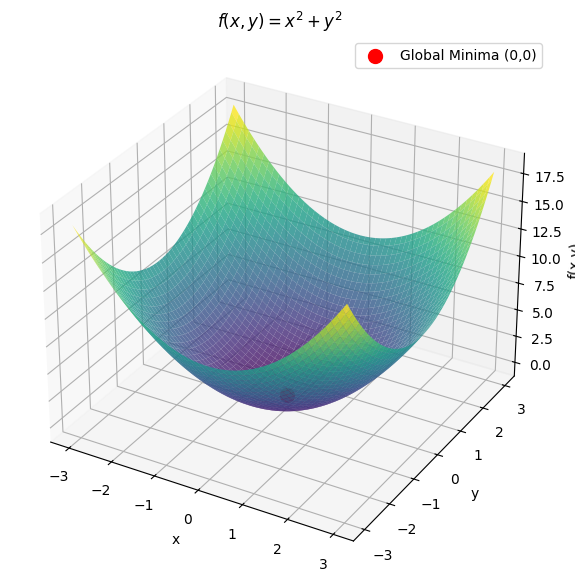

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define function
def f(x, y):
    return x**2 + y**2

# Create grid
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.8)

# Mark global minimum (0,0,0)
ax.scatter(0, 0, 0, color="red", s=100, label="Global Minima (0,0)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title(r"$f(x,y) = x^2 + y^2$")
ax.legend()
plt.show()


### 2.2.1 Gradient Calculation

To apply gradient descent, we need to calculate the gradient of the function. For the quadratic function $f(x,y)=x^2 + y^2$, the gradient is:

$∇f(x,y)=[2x,2y]$

The gradient tells us how the function changes at a given point.

## 2.3 Implementing Gradient descent

Let's see the formula first:

$x_{t+1} = x_t - \eta \nabla f(x_t)$

where:

* $x_{t}$ is the current point.

* $η$ is the learning rate.

* $∇f(x_{t}​)$ is the gradient at the current point.

In [ ]:
# Gradient descent without path output
def simple_gradient_descent(f_grad, init_point, learning_rate=0.1, iterations=100):
    point = list(init_point)
    for _ in range(iterations):
        grad = f_grad(point)
        point = [p - learning_rate * g for p, g in zip(point, grad)]
    return point

In [ ]:
def quadratic_function(point):
    x, y = point
    return x**2 + y**2

def quadratic_gradient(point):
    x, y = point
    return [2 * x, 2 * y]

# 3. Gradient Descent with Momentum

sometimes gradient descent is slow and gets stuck, especially on bumpy paths to the minimum.

So, how do we speed it up? We use momentum. Imagine pushing a heavy shopping cart. Instead of stopping and starting, you build momentum. This helps you move faster.

## 3.2 Introducing Momentum

Momentum in optimization is like a push in physical movement. It reduces oscillations (back-and-forth movements) as you head toward the minimum point. Essentially, it helps you move down faster and more steadily.

Let's look at the formulas for momentum:


$v_t = βv_t − α∇f(θ_t − 1)$

$θ_t = θ_t − 1 + v_t$

Here's what these terms mean:

  * $v_t$: Velocity at time step $t$. It shows speed and direction.
  * $θ$: This is the common symbol for the parameters of the function we're optimizing, similar to variables like
$x$ and $y$ in a function $f(x,y)$.
  * $β$: Momentum term, usually between 0 and 1. Higher values mean more momentum.
  * $α$: Learning rate, controlling step size.
  * $∇f(θ_t−1​)$: Gradient of function $f$ at the current point.
  * $θ_t$: Updated parameter at time step $t$, bringing us closer to the minimum.

## 3.3 How Velocity Works in Gradient Descent with Momentum

In the basic gradient descent, the update to the parameters is directly proportional to the gradient of the function. However, this approach can be slow due to the oscillations around the minimum.

With momentum, the velocity term $v_t$ is introduced to accelerate gradient vectors in the right directions.

Here's a detailed breakdown of how the velocity term works:

1. Initial Update (at $t=0$)
    * Velocity starts at zero:
$v_0=0$ .
    * The first update is similar to basic gradient descent.
2. Subsequent Updates (at $t>0$)
    * The velocity is updated with a fraction of the previous velocity,
$v_t−1$​, scaled by $β$, and the current gradient, scaled by $α$.

    * This means that the update direction is influenced not just by the current gradient but also by the past gradients, providing a smoothing effect.
    
    * The point is updated using this velocity.

In essence, the velocity term accumulates the gradients of past steps to create a more stable and faster approach toward the minimum.

In [1]:
# Example function: f(x, y) = x^2 + y^2
def quadratic_gradient(point):
    x, y = point
    return [2 * x, 2 * y]


# Gradient descent with momentum
def gradient_descent_with_momentum(f_grad, init_point, learning_rate=0.1, momentum=0.9, iterations=100):
    point = list(init_point)
    velocity = [0] * len(point)
    for _ in range(iterations):
        grad = f_grad(point)
        for i in range(len(point)):
            velocity[i] = momentum * velocity[i] - learning_rate * grad[i]
            point[i] += velocity[i]
        print(f"point {point}")
    return point

    # Initial point
init_point = [2, 2]

# Find the optimal point using gradient descent with momentum
optimal_point_momentum = gradient_descent_with_momentum(quadratic_gradient, init_point, learning_rate=0.1, iterations=100)
print("Optimal point after gradient descent with momentum:", optimal_point_momentum)  # Optimal point after gradient descent with momentum: [~0, ~0]


point [1.6, 1.6]
point [0.9199999999999999, 0.9199999999999999]
point [0.12399999999999967, 0.12399999999999967]
point [-0.6172000000000005, -0.6172000000000005]
point [-1.1608400000000008, -1.1608400000000008]
point [-1.4179480000000007, -1.4179480000000007]
point [-1.3657556000000004, -1.3657556000000004]
point [-1.04563132, -1.04563132]
point [-0.5483932039999998, -0.5483932039999998]
point [0.008799741200000377, 0.008799741200000377]
point [0.5085134436400005, 0.5085134436400005]
point [0.8565530871080005, 0.8565530871080005]
point [0.9984781488076003, 0.9984781488076003]
point [0.9265150745757201, 0.9265150745757201]
point [0.6764452928518839, 0.6764452928518839]
point [0.3160934307300546, 0.3160934307300546]
point [-0.07144193132560273, -0.07144193132560273]
point [-0.4059353709105738, -0.4059353709105738]
point [-0.625792392354933, -0.625792392354933]
point [-0.6985052331838697, -0.6985052331838697]
point [-0.6242457432931388, -0.6242457432931388]
point [-0.4325630537328532, -0.

## 3.4 Benefits of Using Momentum

1. Faster Convergence: Reaches the minimum quicker.

3. Reduced Oscillations: Smoothens the path, reducing back-and-forth movements.

2. Better Navigation Through Local Minima: Avoids getting stuck in small bumps and oscillations.

# 4. Adaptive Learning Rate Methods

**Adaptive Learning Rate Methods** are used in optimization algorithms in training of Machine learning models. These methods adjust the learning rate and optimize the step size helping optimization converge more effectively , making the training process faster and more accurate.

## 4.1 What Are Adaptive Learning Rate Methods

Unlike traditional methods where the learning rate is fixed, adaptive methods change the learning rate based on certain criteria, often related to gradient information. This adjustment helps the algorithm converge faster and more reliably.

For example, imagine you're walking towards the lowest point in a hilly landscape. If you keep taking big steps, you might miss the lowest point. If you take small steps, it might take too long. Adaptive learning rate methods help you adjust your step size based on how steep the hill is, allowing you to reach the lowest point more efficiently.

Adaptive learning rates offer many advantages:

**Efficiency**: Training can be faster because it adjusts the learning rate dynamically.

**Stability**: Helps prevent the algorithm from overshooting the minimum.

**Adaptability**: Works well with different types of data and does not require extensive tuning.

## 4.2 Introduction to Adagrad

One popular adaptive method is Adagrad (Adaptive Gradient Algorithm). It adjusts the learning rate based on past gradients. This means that parameters receiving large updates get smaller learning rates over time, while parameters receiving smaller updates get larger learning rates.

Adagrad is useful for dealing with sparse data, where some parameters are updated more frequently than others.

Here's a breakdown of how Adagrad works:

1. Initialize Parameters: Start with an initial point and learning rate.
2. Initialize Gradient Accumulator: Set an accumulator to zero.
3. Update Parameters:
The key aspect of Adagrad is the calculation of the adjusted learning rate:

$
\text{adjusted learning rate} = \frac{\text{learning rate}}{\sqrt{\text{grad accum}} + \epsilon}
$

where $ϵ$ is a small value to prevent division by zero.

## 4.3 Implementing Adagrad

We'll optimize the function
 $f(x,y)=sin(x)+cos(y)+x^2+y^2$

This function has plenty of features and variations that make the use of Adagrad significant.

### steps

1. **Initialize Parameters**: point starts at [2, 2], learning rate is 0.
2. **Initialize Gradient Accumulator**: grad_accum starts as [0, 0].
3. **Iterate**: For each iteration:
  
    * Compute gradients grad = f_grad(point).
    * Update grad_accum by adding the square of each gradient component.
    * Compute adjusted_grad by dividing each gradient by the square root of the accumulated gradient plus $ϵ$
    * Update point using the adjusted gradients.

In [ ]:
import numpy as np

def gradient_f(point):
    x, y = point
    grad_x = np.cos(x) + 2 * x
    grad_y = -np.sin(y) + 2 * y
    return np.array([grad_x, grad_y])

def adagrad(f_grad, init_point, learning_rate=0.01, epsilon=1e-8, iterations=100):
    point = np.array(init_point, dtype=np.float64)
    grad_accum = np.zeros_like(point, dtype=np.float64)
    path = [point]

    for _ in range(iterations):
        grad = f_grad(point)
        grad_accum += grad**2
        adjusted_grad = grad / (np.sqrt(grad_accum) + epsilon)
        point -= learning_rate * adjusted_grad
        path.append(point)

    return point, np.array(path)

init_point = [2, 2]
optimal_point, path_adagrad = adagrad(gradient_f, init_point, learning_rate=0.1, iterations=100)
print("Optimal point after Adagrad optimization:", optimal_point)  # Optimal point after Adagrad optimization: [ 0.37767767 0.63898949 ]